In [1]:
import pandas as pd
df=pd.read_csv('ped_crashes.csv')
print(df)

      Crash Year Crash Month  Crash Day            Time of Day Day of Week  \
0           2018    February          1     9:00 AM - 10:00 AM    Thursday   
1           2018    February          1      7:00 PM - 8:00 PM    Thursday   
2           2018    February          1  11:00 AM - 12:00 noon    Thursday   
3           2018    February          1      6:00 PM - 7:00 PM    Thursday   
4           2018       March          1      2:00 PM - 3:00 PM    Thursday   
...          ...         ...        ...                    ...         ...   
6804        2010        July         31      2:00 AM - 3:00 AM    Saturday   
6805        2010      August         31      2:00 PM - 3:00 PM     Tuesday   
6806        2010     October         31      8:00 PM - 9:00 PM      Sunday   
6807        2010    December         31      1:00 PM - 2:00 PM      Friday   
6808        2010    December         31    10:00 PM - 11:00 PM      Friday   

            City or Township     Crash: Intersection Crash: Hit

In [2]:
new_df=df['Crash Year'].value_counts()
print(new_df)

2018    822
2015    801
2011    797
2013    788
2014    765
2010    755
2017    723
2012    707
2016    651
Name: Crash Year, dtype: int64


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018] [755, 797, 707, 788, 765, 801, 651, 723, 822]


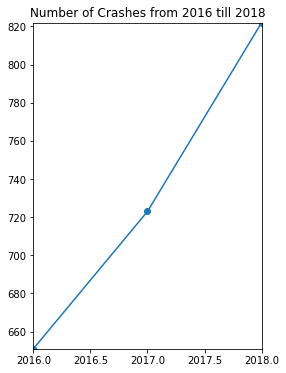

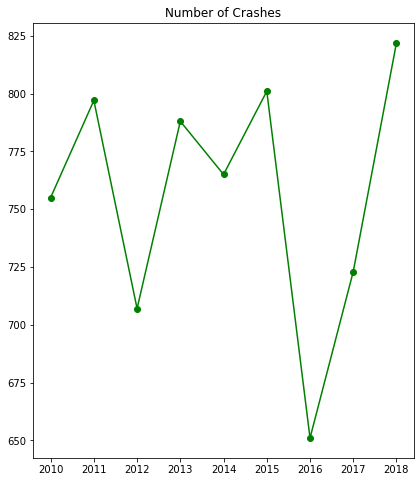

In [3]:
list=[[2010,755],[2011,797],[2012,707],[2013,788],[2014,765],[2015,801],[2016,651],[2017,723],[2018,822]] 
list1=[i[0] for i in list]
list2=[i[1] for i in list]
print(list1,list2)
from matplotlib import pyplot as plt
#1st subplot
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.plot(list1,list2,marker='o')
plt.title('Number of Crashes from 2016 till 2018')
plt.axis([2016,2018,651,822])
plt.figure(figsize=(15,8))
#2nd subplot
plt.subplot(1,2,2)
plt.plot(list1,list2,color='green',marker='o')
plt.title('Number of Crashes')
plt.show()

In [4]:
Crashes_per_month=df['Crash Month'].value_counts().rename_axis('Month').reset_index(name='Crashes')
month_dict={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
new_Crashes_per_month=Crashes_per_month.sort_values('Month', key=lambda x: x.apply(lambda x: month_dict[x]))
print(new_Crashes_per_month)

        Month  Crashes
6     January      559
10   February      482
7       March      542
11      April      446
5         May      580
4        June      586
8        July      531
9      August      512
1   September      647
0     October      695
2    November      625
3    December      604


Text(0.5, 1.0, 'Crashes per month')

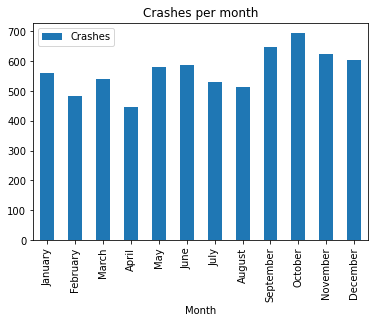

In [5]:
new_Crashes_per_month.plot.bar(x='Month',y='Crashes')
plt.title('Crashes per month')

In [6]:
crashes_per_time_of_day=df['Time of Day'].value_counts().rename_axis('Time of the day').reset_index(name='Crashes')
print(crashes_per_time_of_day[0:24])
print(crashes_per_time_of_day.info())


              Time of the day  Crashes
0           6:00 PM - 7:00 PM      535
1           7:00 PM - 8:00 PM      498
2           5:00 PM - 6:00 PM      491
3           3:00 PM - 4:00 PM      461
4           4:00 PM - 5:00 PM      452
5           8:00 PM - 9:00 PM      439
6          9:00 PM - 10:00 PM      353
7           2:00 PM - 3:00 PM      342
8         10:00 PM - 11:00 PM      336
9           7:00 AM - 8:00 AM      314
10  11:00 PM - 12:00 midnight      289
11       12:00 noon - 1:00 PM      273
12          1:00 PM - 2:00 PM      270
13          8:00 AM - 9:00 AM      233
14      11:00 AM - 12:00 noon      231
15        10:00 AM - 11:00 AM      195
16          2:00 AM - 3:00 AM      184
17   12:00 midnight - 1:00 AM      177
18         9:00 AM - 10:00 AM      165
19          1:00 AM - 2:00 AM      159
20          6:00 AM - 7:00 AM      147
21          5:00 AM - 6:00 AM       93
22          3:00 AM - 4:00 AM       89
23          4:00 AM - 5:00 AM       77
<class 'pandas.core.frame

In [8]:
crashes_per_time_of_day['AM/PM/Noon']=crashes_per_time_of_day['Time of the day'].apply(lambda x:x.split()[-1])
print(crashes_per_time_of_day)


              Time of the day  Crashes AM/PM/Noon
0           6:00 PM - 7:00 PM      535         PM
1           7:00 PM - 8:00 PM      498         PM
2           5:00 PM - 6:00 PM      491         PM
3           3:00 PM - 4:00 PM      461         PM
4           4:00 PM - 5:00 PM      452         PM
5           8:00 PM - 9:00 PM      439         PM
6          9:00 PM - 10:00 PM      353         PM
7           2:00 PM - 3:00 PM      342         PM
8         10:00 PM - 11:00 PM      336         PM
9           7:00 AM - 8:00 AM      314         AM
10  11:00 PM - 12:00 midnight      289   midnight
11       12:00 noon - 1:00 PM      273         PM
12          1:00 PM - 2:00 PM      270         PM
13          8:00 AM - 9:00 AM      233         AM
14      11:00 AM - 12:00 noon      231       noon
15        10:00 AM - 11:00 AM      195         AM
16          2:00 AM - 3:00 AM      184         AM
17   12:00 midnight - 1:00 AM      177         AM
18         9:00 AM - 10:00 AM      165         AM


In [9]:
sum=0
sum2=0
sum3=0
j=0
for i in crashes_per_time_of_day['AM/PM/Noon']:
    if (i=='PM'):
        sum+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
    elif (i=='AM'):
        sum2+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
    else:
        sum3+=crashes_per_time_of_day._get_value(j,'Crashes')
        j+=1
print(sum,sum2,sum3)

4450 1833 526


Text(0.5, 1.0, 'When most crashes happened during the day?')

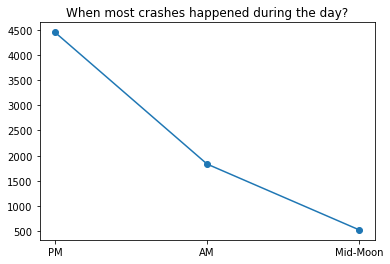

In [124]:
list=[['PM',4450],['AM',1833],['Mid-Moon',526]]
AM_PM=[i[0] for i in list]
Crashes=[i[1] for i in list]
plt.plot(AM_PM,Crashes,marker='o')
plt.title('When most crashes happened during the day?')

In [3]:
temp_df=df[['Crash Year','Crash Month']]
temp_df.rename(columns={'Crash Year':'Crash_Year','Crash Month':'Crash_Month'},inplace=True)
print(temp_df)

      Crash_Year Crash_Month
0           2018    February
1           2018    February
2           2018    February
3           2018    February
4           2018       March
...          ...         ...
6804        2010        July
6805        2010      August
6806        2010     October
6807        2010    December
6808        2010    December

[6809 rows x 2 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_8948\541489616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.rename(columns={'Crash Year':'Crash_Year','Crash Month':'Crash_Month'},inplace=True)


In [28]:
df_2017=temp_df[temp_df.Crash_Year==2017]
print(df_2017)
Jan=sum(i=="January" for i in df_2017.Crash_Month)
Feb=sum(i=="February" for i in df_2017.Crash_Month)
March=sum(i=="March" for i in df_2017.Crash_Month)
April=sum(i=="April" for i in df_2017.Crash_Month)
May=sum(i=="May" for i in df_2017.Crash_Month)
June=sum(i=="June" for i in df_2017.Crash_Month)
July=sum(i=="July" for i in df_2017.Crash_Month)
August=sum(i=="August" for i in df_2017.Crash_Month)
September=sum(i=="September" for i in df_2017.Crash_Month)
October=sum(i=="October" for i in df_2017.Crash_Month)
November=sum(i=="November" for i in df_2017.Crash_Month)
December=sum(i=="December" for i in df_2017.Crash_Month)


      Crash_Year Crash_Month
822         2017     January
823         2017     January
824         2017     January
825         2017     January
826         2017    February
...          ...         ...
1540        2017     October
1541        2017     October
1542        2017     October
1543        2017     October
1544        2017    December

[723 rows x 2 columns]


[['Jan', 57], ['Feb', 41], ['March', 54], ['April', 55], ['May', 62], ['June', 67], ['July', 68], ['August', 57], ['September', 64], ['October', 72], ['November', 64], ['December', 62]]
        Month  Crashes
0         Jan       57
1         Feb       41
2       March       54
3       April       55
4         May       62
5        June       67
6        July       68
7      August       57
8   September       64
9     October       72
10   November       64
11   December       62


<AxesSubplot:xlabel='Month'>

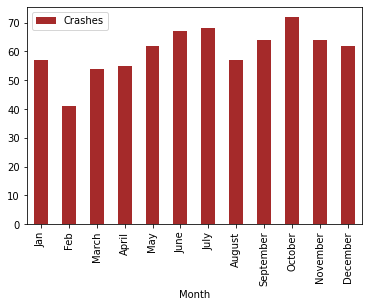

In [29]:
crashes_in_2017_monthly=[['Jan',Jan],['Feb',Feb],['March',March],['April',April],['May',May],['June',June],['July',July],['August',August],['September',September],['October',October],['November',November],['December',December]]
print(crashes_in_2017_monthly)
crashes_in_2017_monthly_df=pd.DataFrame(crashes_in_2017_monthly)
cols=['Month','Crashes']
crashes_in_2017_monthly_df.columns=cols
print(crashes_in_2017_monthly_df)
crashes_in_2017_monthly_df.plot.bar(x='Month',y='Crashes',color='brown')


In [30]:
df_2018=temp_df[temp_df.Crash_Year==2018]
print(df_2018)
Jan=sum(i=="January" for i in df_2018.Crash_Month)
Feb=sum(i=="February" for i in df_2018.Crash_Month)
March=sum(i=="March" for i in df_2018.Crash_Month)
April=sum(i=="April" for i in df_2018.Crash_Month)
May=sum(i=="May" for i in df_2018.Crash_Month)
June=sum(i=="June" for i in df_2018.Crash_Month)
July=sum(i=="July" for i in df_2018.Crash_Month)
August=sum(i=="August" for i in df_2018.Crash_Month)
September=sum(i=="September" for i in df_2018.Crash_Month)
October=sum(i=="October" for i in df_2018.Crash_Month)
November=sum(i=="November" for i in df_2018.Crash_Month)
December=sum(i=="December" for i in df_2018.Crash_Month)

     Crash_Year Crash_Month
0          2018    February
1          2018    February
2          2018    February
3          2018    February
4          2018       March
..          ...         ...
817        2018     October
818        2018     October
819        2018     October
820        2018    December
821        2018    December

[822 rows x 2 columns]


[['Jan', 66], ['Feb', 74], ['March', 52], ['April', 48], ['May', 61], ['June', 72], ['July', 58], ['Aug', 55], ['Sep', 87], ['Oct', 83], ['Nov', 83], ['Dec', 83]]
    Month  Crashes
0     Jan       66
1     Feb       74
2   March       52
3   April       48
4     May       61
5    June       72
6    July       58
7     Aug       55
8     Sep       87
9     Oct       83
10    Nov       83
11    Dec       83


<AxesSubplot:xlabel='Month'>

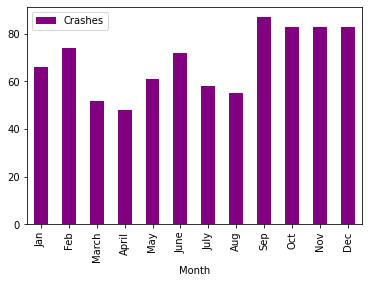

In [31]:
crashes_in_2018_monthly=[['Jan',Jan],['Feb',Feb],['March',March],['April',April],['May',May],['June',June],['July',July],['Aug',August],['Sep',September],['Oct',October],['Nov',November],['Dec',December]]
print(crashes_in_2018_monthly)
crashes_in_2018_monthly_df=pd.DataFrame(crashes_in_2018_monthly)
cols=['Month','Crashes']
crashes_in_2018_monthly_df.columns=cols
print(crashes_in_2018_monthly_df)
crashes_in_2018_monthly_df.plot.bar(x='Month',y='Crashes',color='purple')


In [32]:
list_months=[i[0] for i in crashes_in_2018_monthly]
values_2018=[i[1] for i in crashes_in_2018_monthly]
values_2017=[i[1] for i in crashes_in_2017_monthly]
print(list_months)
print(values_2018)
print(values_2017)

['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[66, 74, 52, 48, 61, 72, 58, 55, 87, 83, 83, 83]
[57, 41, 54, 55, 62, 67, 68, 57, 64, 72, 64, 62]


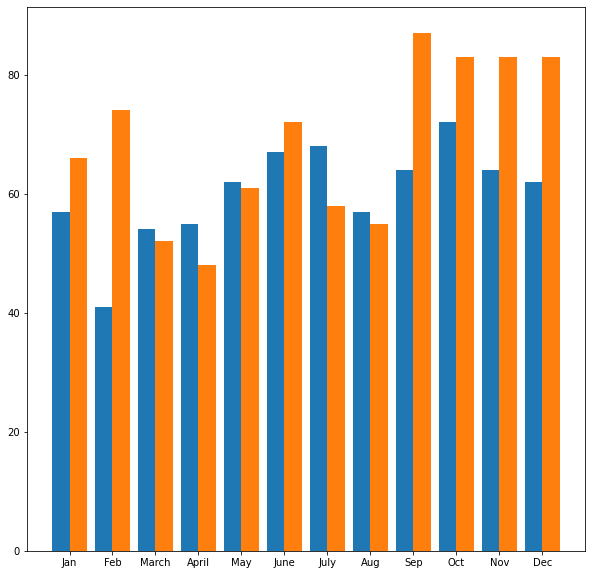

In [33]:
from matplotlib import pyplot as plt

list_months=[i[0] for i in crashes_in_2018_monthly]
values_2018=[i[1] for i in crashes_in_2018_monthly]
values_2017=[i[1] for i in crashes_in_2017_monthly]
plt.figure(figsize=(10,10))

ax=plt.subplot()
xticks=[(x1+x2)/2 for x1,x2 in zip(store1_x,store2_x)]
plt.xticks(xticks,list_months)

n=1
t=2
d=12
w=0.8
store1_x=[t*element +w*n for element in range(d)]
plt.bar(store1_x,values_2017)

n=2
t=2
d=12
w=0.8
store2_x=[t*element+w*n for element in range(d)]
plt.bar(store2_x,values_2018)
plt.show()